<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Sesion11/Clase_11_Regresio%CC%81n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)

**Ver la presentación  [acá](https://github.com/jazaineam1/Andes_ADDBD/raw/main/Sesion11/Clase%2011%20-%20Regresión%20lineal.pdf)**

# Modelos de regresión múltiple
**Objetivos de nuestra práctica de hoy**
<ul>
<li>¡Estimar modelos de regresión lineal en Python!</li>
<li>Dialogar con los modelos para estudiar la relación entre las variables, analíticamente. No porque el modelo se ajuste bien sabemos que existe una relación estructural de fondo.</li>
<li>¡Jugar! Haremos variaciones con los datos para probar y comparar diferentes modelos.</li>
</ul>


# Cargando datos

In [ ]:
%%capture
pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**Para esta primera parte**: trabajaremos con datos de calidad de muestras de vino tinto. Queremos enfocarnos en estudiar la calidad reportada del vino, en relación con las demás características que lo describen.

In [ ]:
# De https://archive.ics.uci.edu/dataset/186/wine+quality
datos_vino = pd.read_csv('https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion11/winequality-red.csv', sep=";")

In [ ]:
datos_vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
datos_vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
datos_vino.shape

(1599, 12)

## Breve exploración de la variable de interés

In [ ]:
datos_vino['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

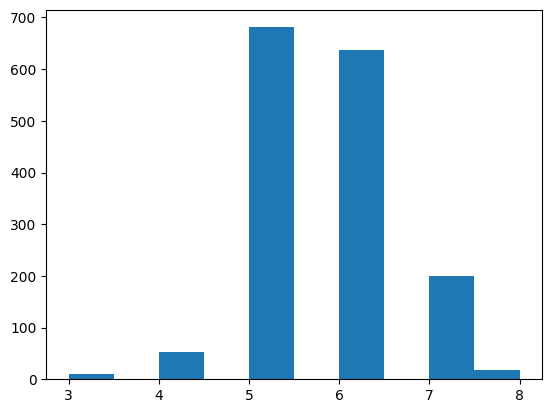

In [ ]:
plt.hist(datos_vino['quality'])

## Breve exploración de posibles variables explicativas

In [ ]:
datos_vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Matriz de correlaciones
datos_vino.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Hay muchas variables** para visualizarlo con mayor facilidad, armamos un mapa de calor.

<Axes: >

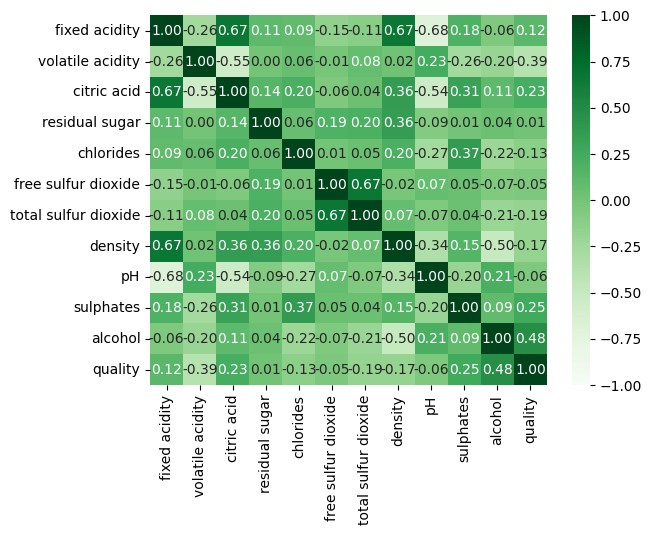

In [ ]:
# Heatmap de correlaciones
sns.heatmap(data = datos_vino.corr(), annot=True, fmt=".2f", vmax=1, vmin=-1, cmap="Greens")

**NOTA:** Esto nos da una guía de las variables con mayor potencial predictivo para nuestra variable de calidad. Pero debe estar mediado por **un análisis teórico**. ¿Tiene sentido que cierta variable contenga información de nuestra variable objetivo?

* *Alcohol* es de las variables que tiene una relación más fuerte con calidad, seguida de *sulfatos*.

# Modelos de regresión

## Regresión lineal

In [ ]:
datos = datos_vino[['alcohol', 'quality']]
datos.head()

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5


In [ ]:
# Ajuste del modelo univariado
#                    Y = b0 + b1*X + e
# Es decir:       Calidad = b0 + b1*Alcohol + e

X = datos[['alcohol']]
Y = datos['quality']

modelo_lineal = LinearRegression()
modelo_lineal.fit(X, Y)

LinearRegression()

**Las estimaciones de los parámetros nos dan:**

In [ ]:
# Beta 0
modelo_lineal.intercept_

1.8749748869971508

**Interpretación del intercepto**

El nivel promedio de calidad cuando el alcohol (o todas las variables independientes) tiene valor de cero, es 1.87.

In [ ]:
# Beta 1
modelo_lineal.coef_

array([0.36084177])

In [ ]:
X_nuevo=np.array([[10]])
al10=modelo_lineal.predict(X_nuevo)
X_nuevo2=np.array([[11]])
al11=modelo_lineal.predict(X_nuevo2)
al11

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.84423431])

In [ ]:
al11-al10

array([0.36084177])

**Interpretación de los coeficientes:**

Un incremento de una unidad de alcohol está asociada a un incremento (el coeficiente es positivo) promedio de 0.36 unidades en la puntuación de calidad.

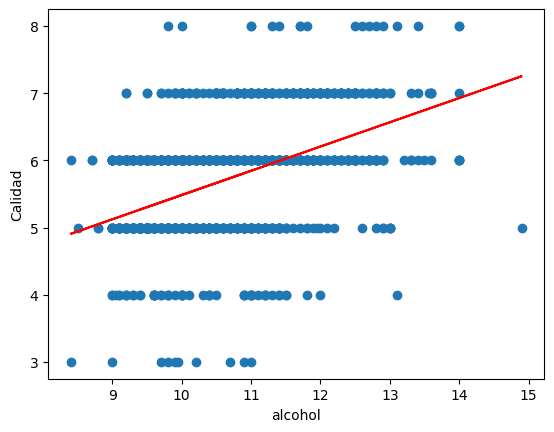

In [ ]:
# Gráfica de dispersión con línea de tendencia
calidad_predicha = modelo_lineal.predict(X)
plt.scatter(X, Y)
plt.plot(X, calidad_predicha, color='red')
plt.xlabel('alcohol')
plt.ylabel('Calidad')
plt.show()

## Regresión múltiple

Agreguemos la variable sulfatos al modelo

In [ ]:
datos = datos_vino[['alcohol', 'volatile acidity','sulphates', 'quality']]
datos.head()

,alcohol,volatile acidity,sulphates,quality
0,9.4,0.70,0.56,5
1,9.8,0.88,0.68,5
2,9.8,0.76,0.65,5
3,9.8,0.28,0.58,6
4,9.4,0.70,0.56,5


In [ ]:
# Ajuste del modelo multivariado
#                    Y = b0 + b1*X1 + b2*X2 + e
# Es decir:       Calidad = b0 + b1*Alcohol + b2*Sulfatos + e

X = datos[['alcohol','volatile acidity']]
Y = datos['quality']

modelo_lineal_multi = LinearRegression()
modelo_lineal_multi.fit(X, Y)

calidad_predicha_multi = modelo_lineal_multi.predict(X)

In [ ]:
modelo_lineal_multi.intercept_

3.095471272913767

In [ ]:
modelo_lineal_multi.coef_

array([ 0.31381252, -1.38363571])

**Notamos** que el coeficiente de nuestra variable independiente original va dececiendo.

* Esto es porque parte de la información que contiene esa variable sobre la variable dependiente, ahora está siendo capturada por parte de la información en las demás variables predictoras.

* A veces esto se puede interpretar como que la relación entre las dos variables está mediada por las demás cofactores (pero ojo con las afirmaciones causales).

**¡Noten!** La magnitud del coeficiente no depende de qué tan fuerte es la correlación. Si bien la correlación entre alcohol y calidad es mayor, el coeficiente de sulfatos es más alto que el de alcohol.

**Esto responde más a** la unidad con que se mide cada variable.

In [ ]:
# R cuadrado de cada uno de los dos modelos
r2_uni = r2_score(datos['quality'], calidad_predicha)
r2_multi = r2_score(datos['quality'], calidad_predicha_multi)

print('R cuadrado - modelo univariado - alcohol:', r2_uni)
print('R cuadrado - modelo multivariado - :', r2_multi)

R cuadrado - modelo univariado - alcohol: 0.22673436811275482
R cuadrado - modelo multivariado - : 0.31700243279698526


**Vemos que:** El modelo multivariado explica una mayor proporción de la varianza de la calidad que el modelo univariado.


Sin embargo...

**Utilizamos el R<sup>2</sup> ajustado**: cuando queremos comparar dos modelos con la misma variable dependiente, pero diferente número de variables independientes:

* El R<sup>2</sup> ajustado penaliza por agregar más variables predictivas al modelo.

  **"Sí, muy bonito que predice mejor... ¡pero usa 200 variables predictivas!"**
* Por eso, el R<sup>2</sup> suele ser más pequeño que el R<sup>2</sup> ajustado, para el mismo modelo.

In [ ]:
# R cuadrado ajustado
n = len(X)
p_multi = len(X.columns) # para el múltiple
p_uni = 1 # El modelo univariado tiene una sola columna

#Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2_uni = 1- ((1-r2_uni) * (n-1)/(n-p_uni-1))
adj_R2_multi = 1- ((1-r2_multi) * (n-1)/(n-p_multi-1))

print('R cuadrado ajustado - modelo univariado:', adj_R2_uni)
print('R cuadrado ajustado - modelo multivariado:', adj_R2_multi)

R cuadrado ajustado - modelo univariado: 0.22625016921990126
R cuadrado ajustado - modelo multivariado: 0.3161465461212922


**Al final**: Igual tenemos que el modelo multivariado, aún ajustando por número de variables, predice una mayor cantidad de la varianza de la calidad.



## Ejercicio
El conjunto de datos de la vivienda de California contiene información recopilada del censo de EE. UU. de 1990. Contiene 20,640 muestras y 9 características. Cada muestra corresponde a un bloque censal, que es la unidad geográfica más pequeña para la que publica datos la Oficina del Censo de EE. UU.

Características:

**MedInc**: ingreso medio del hogar para los hogares dentro de un bloque en unidades de decenas de miles de dólares.

**HouseAge**: edad media de la casa dentro de un bloque.

**AveRooms**: número medio de habitaciones por hogar dentro de un bloque.

**AveBedrms**: número medio de dormitorios por hogar dentro de un bloque.

**Population**: población total de un bloque.
**AveOccup**: número medio de ocupantes de la vivienda en un bloque.

**Latitude**: latitud de un bloque

**Longitude**: longitud de un bloque.

### Objetivo:


**MedHouseVal**: valor medio de la vivienda para las viviendas dentro de un bloque en unidades de cientos de miles de dólares.

proponga un modelo de regresión lienal simple y uno de regresión lineal múltiple.


In [10]:
from sklearn.datasets import fetch_california_housing # Use fetch_california_housing instead of load_boston

# Load the California housing dataset
housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [8]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])